In [21]:
import numpy as np

def de_boor(k, x, t, c, p):
    """
    Evaluate B-spline at position x using de Boor's algorithm.

    Parameters:
    k : index of knot interval that contains x (k satisfies t[k] <= x < t[k+1])
    x : position to evaluate the spline
    t : knot vector (array-like)
    c : control points (array-like)
    p : degree of the spline

    Returns:
    Spline value at x
    """
    d = [c[j + k - p] for j in range(0, p + 1)]
    for r in range(1, p + 1):
        for j in range(p, r - 1, -1):
            alpha = (x - t[j + k - p]) / (t[j + 1 + k - r] - t[j + k - p])
            d[j] = (1.0 - alpha) * d[j - 1] + alpha * d[j]
    return d[p]

# Example usage:
# degree = 3
# knots = np.array([0, 0, 0, 0, 1, 2, 3, 4, 4, 4, 4])
# control_points = np.array([0, 1, 2, 3, 4, 5, 6])
# x = 2.5
# k = np.searchsorted(knots, x) - 1
# value = de_boor(k, x, knots, control_points, degree)

In [22]:
def create_knots(num_control_points, degree, knot_type='open_uniform'):
    """
    Create a knot vector for a B-spline.

    Parameters:
    num_control_points : int
        Number of control points (n+1).
    degree : int
        Degree of the B-spline (p).
    knot_type : str
        Type of knot vector: 'open_uniform' (default), 'uniform', or 'clamped'.

    Returns:
    knots : np.ndarray
        Knot vector of length num_control_points + degree + 1
    """
    n = num_control_points - 1
    m = n + degree + 1

    if knot_type == 'open_uniform' or knot_type == 'clamped':
        # p+1 zeros, (n-p) uniformly spaced, p+1 ones
        knots = np.zeros(m + 1)
        knots[degree+1:n+1] = np.linspace(0, 1, n - degree + 1)
        knots[n+1:] = 1
    elif knot_type == 'uniform':
        knots = np.linspace(0, 1, m + 1)
    else:
        raise ValueError("Unknown knot_type: {}".format(knot_type))
    return knots

knots = create_knots(3, 2)
print(knots)

[0. 0. 0. 1. 1. 1.]


In [23]:
def create_control_points(n, func=None):
    """
    Create a control points vector of length n+1.
    
    Parameters:
    n : int
        Number of intervals (number of control points will be n+1).
    func : callable, optional
        Function to generate control point values. If None, uses np.arange(n+1).
        The function should accept an integer index and return a value.
        
    Returns:
    np.ndarray
        Array of control points.
    """
    if func is None:
        return np.arange(n + 1)
    else:
        return np.array([func(i) for i in range(n + 1)])
    
control_points = create_control_points(4)
print(control_points)

[0 1 2 3 4]


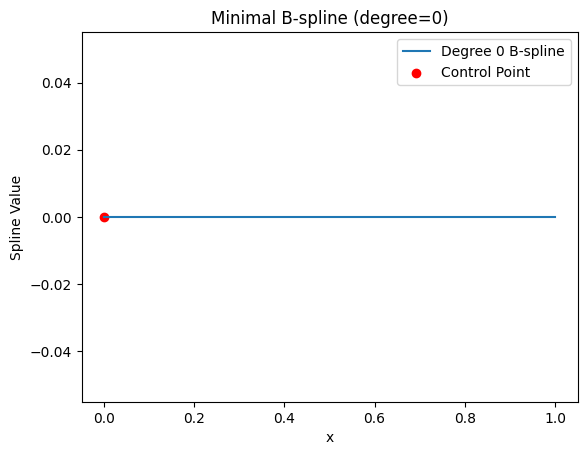

In [24]:
import matplotlib.pyplot as plt

# Minimal degree for a B-spline is 0 (piecewise constant)
degree0 = 0
control_points0 = np.array([0])
knots0 = np.array([0, 1])  # minimal: n + p + 2 = 1 + 0 + 2 = 3, but for degree 0, 2 knots suffice for 1 segment

# Evaluate spline at several points
x_vals0 = np.linspace(0, 1, 100)
k0 = degree0  # For x in [0,1), k=degree for minimal case
y_vals0 = [de_boor(k0, x, knots0, control_points0, degree0) for x in x_vals0]

plt.plot(x_vals0, y_vals0, label='Degree 0 B-spline')
plt.scatter(control_points0, control_points0, color='red', label='Control Point')
plt.title('Minimal B-spline (degree=0)')
plt.xlabel('x')
plt.ylabel('Spline Value')
plt.legend()
plt.show()

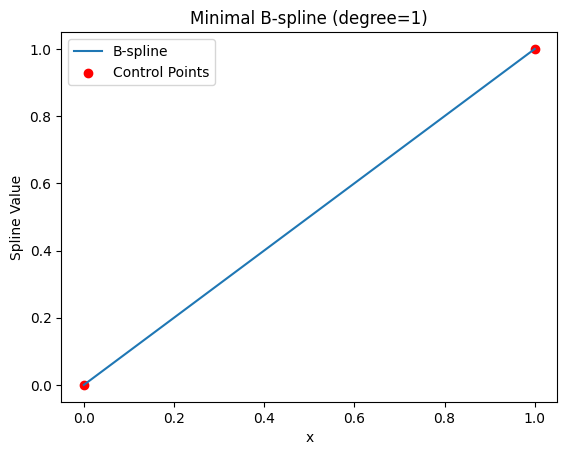

In [25]:
import matplotlib.pyplot as plt

# Minimal degree for a B-spline is 1 (linear)
degree = 1
# Minimal number of knots for degree p and n+1 control points: len(knots) = n + p + 2
control_points1 = np.array([0, 1])
knots = np.array([0, 0, 1, 1])

# Evaluate spline at several points
x_vals = np.linspace(0, 1, 100)
k = degree  # For x in [0,1), k=degree for minimal case
y_vals = [de_boor(k, x, knots, control_points1, degree) for x in x_vals]

indices1 = np.arange(len(control_points1))

plt.plot(x_vals, y_vals, label='B-spline')
plt.scatter(indices1/(len(indices1)-1), control_points1, color='red', label='Control Points')
plt.title('Minimal B-spline (degree=1)')
plt.xlabel('x')
plt.ylabel('Spline Value')
plt.legend()
plt.show()

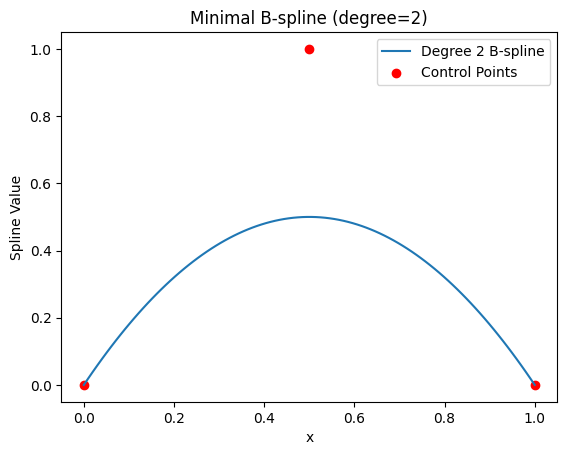

In [31]:
# Minimal degree for a B-spline is 2 (quadratic)
degree2 = 2
# For minimal quadratic B-spline: n+1 control points, len(knots) = n + p + 2
# Minimal: n = 2 (so 3 control points), knots = 2 + 2 + 2 = 6
#control_points2 = np.array([0, 1, 2])
#control_points2 = np.array([0, np.log(1), np.log(2)])
#control_points2 = np.array([np.exp(0), np.exp(1), np.exp(2)])
control_points2 = np.array([0, 1, 0])
knots2 = np.array([0, 0, 0, 1, 1, 1])  # Open uniform knot vector

# Evaluate spline at several points
x_vals2 = np.linspace(0, 1, 100)
k2 = degree2  # For x in [0,1), k=degree for minimal case
y_vals2 = [de_boor(k2, x, knots2, control_points2, degree2) for x in x_vals2]

indices2 = np.arange(len(control_points2))

plt.plot(x_vals2, y_vals2, label='Degree 2 B-spline')
plt.scatter(indices2/(len(indices2)-1), control_points2, color='red', label='Control Points')
plt.title('Minimal B-spline (degree=2)')
plt.xlabel('x')
plt.ylabel('Spline Value')
plt.legend()
plt.show()

[0.         0.33333333 0.         0.33333333]


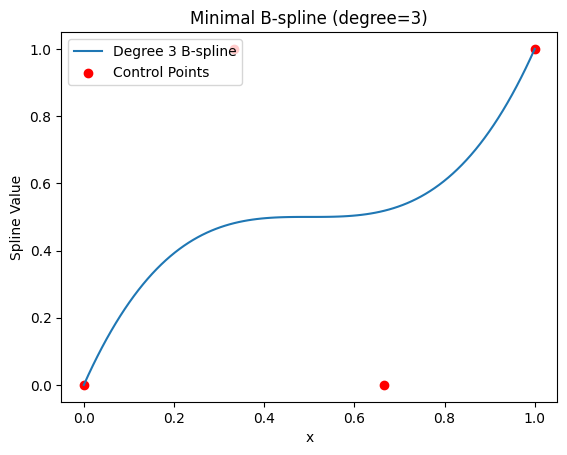

In [27]:
# Minimal degree for a B-spline is 3 (cubic)
degree3 = 3
# For minimal cubic B-spline: n+1 control points, len(knots) = n + p + 2
# Minimal: n = 3 (so 4 control points), knots = 4 + 3 + 2 = 9
#control_points3 = np.array([0, 1, 2, 3])
#control_points3 = np.array([0, np.log(1), np.log(2), np.log(3)])
#control_points3 = np.array([np.exp(0), np.exp(1), np.exp(2), np.exp(3)])
control_points3 = np.array([0, 1, 0, 1])
knots3 = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])  # Open uniform knot vector

# Evaluate spline at several points
x_vals3 = np.linspace(0, 1, 100)
k3 = degree3  # For x in [0,1), k=degree for minimal case
y_vals3 = [de_boor(k3, x, knots3, control_points3, degree3) for x in x_vals3]

print(control_points3/(len(control_points3)-1))

indices3 = np.arange(len(control_points3))

plt.plot(x_vals3, y_vals3, label='Degree 3 B-spline')
plt.scatter(indices3/(len(indices3)-1), control_points3, color='red', label='Control Points')
plt.title('Minimal B-spline (degree=3)')
plt.xlabel('x')
plt.ylabel('Spline Value')
plt.legend()
plt.show()

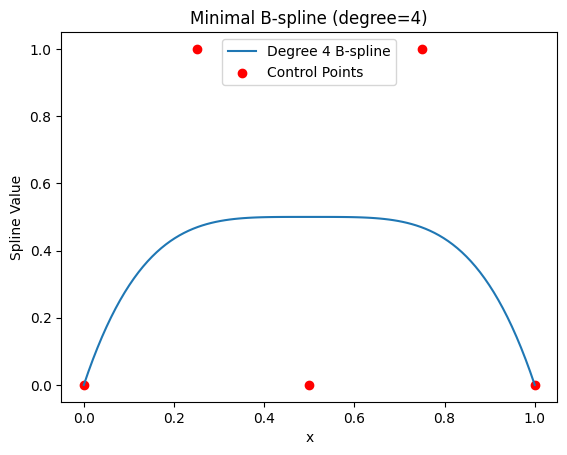

In [28]:
# Minimal degree for a B-spline is 4 (quartic)
degree4 = 4
# For minimal quartic B-spline: n+1 control points, len(knots) = n + p + 2
# Minimal: n = 4 (so 5 control points), knots = 4 + 4 + 2 = 10
#control_points4 = np.array([0, np.log(1), np.log(2), np.log(3), np.log(4)])
#control_points4 = np.array([np.exp(0), np.exp(1), np.exp(2), np.exp(3), np.exp(4)])
control_points4 = np.array([0, 1, 0, 1, 0])
knots4 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # Open uniform knot vector

# Evaluate spline at several points
x_vals4 = np.linspace(0, 1, 100)
k4 = degree4  # For x in [0,1), k=degree for minimal case
y_vals4 = [de_boor(k4, x, knots4, control_points4, degree4) for x in x_vals4]

indices4 = np.arange(len(control_points4))

plt.plot(x_vals4, y_vals4, label='Degree 4 B-spline')
plt.scatter(indices4/(len(indices4)-1), control_points4, color='red', label='Control Points')
plt.title('Minimal B-spline (degree=4)')
plt.xlabel('x')
plt.ylabel('Spline Value')
plt.legend()
plt.show()

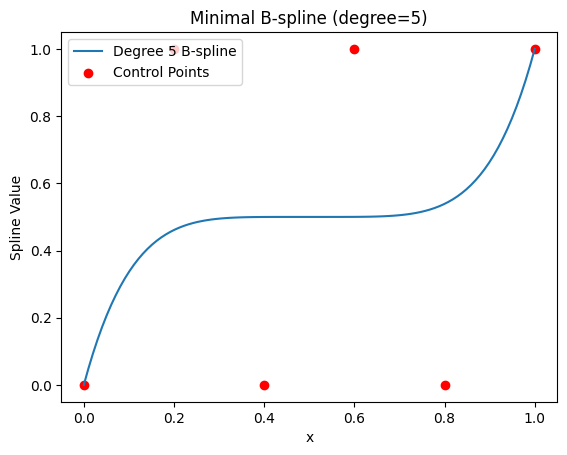

In [33]:
# Minimal degree for a B-spline is 5 (quintic)
degree5 = 5
# For minimal quintic B-spline: n+1 control points, len(knots) = n + p + 2
# Minimal: n = 5 (so 6 control points), knots = 5 + 5 + 2 = 12
control_points5 = np.array([np.exp(0), np.exp(1), np.exp(2), np.exp(3), np.exp(4), np.exp(5)])
control_points5 = np.array([0, 1, 0, 1, 0, 1])
knots5 = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # Open uniform knot vector

# Evaluate spline at several points
x_vals5 = np.linspace(0, 1, 100)
k5 = degree5  # For x in [0,1), k=degree for minimal case
y_vals5 = [de_boor(k5, x, knots5, control_points5, degree5) for x in x_vals5]

indices5 = np.arange(len(control_points5))

plt.plot(x_vals5, y_vals5, label='Degree 5 B-spline')
plt.scatter(indices5/(len(indices5)-1), control_points5, color='red', label='Control Points')
plt.title('Minimal B-spline (degree=5)')
plt.xlabel('x')
plt.ylabel('Spline Value')
plt.legend()
plt.show()

In [30]:
t = np.array([0, 1, 2, 3, 4, 5])
s = np.sin(t)
print(s)

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]
